<a href="https://colab.research.google.com/github/Yergalem1/DataScienc_Coyote_or_Dog_project/blob/main/Image_Classification_Coyote_or_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import Data** 
Download the data- a zip file oof 2000 picturs of cats and dogs



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

Extract the zip file  locally in /tmp and remove cats sub folder from bothe train validation folder

In [ ]:
import os

import zipfile
# extract image
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


# remove cat images
os.system("rm -rf /tmp/cats_and_dogs_filtered/train/cats")
os.system("rm -rf /tmp/cats_and_dogs_filtered/validation/cats")


0

Extract the Cayotes zip file and put it in local /temp folder. And it will cayotes train and validation folder and assign the image80% of the image in the training folder and 20% of images in the training folder.

In [ ]:
# extract coyote images & make train/test splits
import random
import zipfile

local_zip = '/tmp/coyotes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
#this code create coyotes train and validation folder
os.mkdir('/tmp/cats_and_dogs_filtered/train/coyotes')
os.mkdir('/tmp/cats_and_dogs_filtered/validation/coyotes')

# this code assign 80% of the image for training  and 20% of the image for validation  randomely 
for image in os.listdir('/tmp/coyotes'):
  num = random.randint(1,10)
  if num < 3: # validation
    os.system("mv /tmp/coyotes/" +image+ " /tmp/cats_and_dogs_filtered/validation/coyotes")
  else: # train
    os.system("mv /tmp/coyotes/" +image+ " /tmp/cats_and_dogs_filtered/train/coyotes")


The .Zip folder exteracted to the base directory , and this folder contains train and validation subdirectores for training and validation dataset.

In [ ]:
# Base Directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training coyotes pictures
train_coyotes_dir = os.path.join(train_dir, 'coyotes')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation coyotes pictures
validation_coyotes_dir = os.path.join(validation_dir, 'coyotes')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Print names of dogs and cyotes from the train directory and see filenames convensions 

In [ ]:


train_coyotes_fnames = os.listdir(train_coyotes_dir)
print(train_coyotes_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])


['image1133.jpg', 'image840.jpg', 'image1152.jpg', 'image1631.jpg', 'image1226.jpg', 'image1500.jpg', 'image1080.jpg', 'image29.jpg', 'image49.jpg', 'image1633.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


With this code we will find out the total number of coyotes and dog images in the train and validation directories:

In [ ]:
print('total training coyotes images:', len(os.listdir(train_coyotes_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation coyotes images:', len(os.listdir(validation_coyotes_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))



total training coyotes images: 721
total training dog images: 1000
total validation coyotes images: 204
total validation dog images: 500


For   dogs, we have 1,000 training images and 500 test images. And for coyotes we  have 750  training  and  175  test images.

configure the matplot parameters to have a better sence of what the dog and coyotes  look like



In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,Model


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Dysplay a batch of 8 cyotes and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

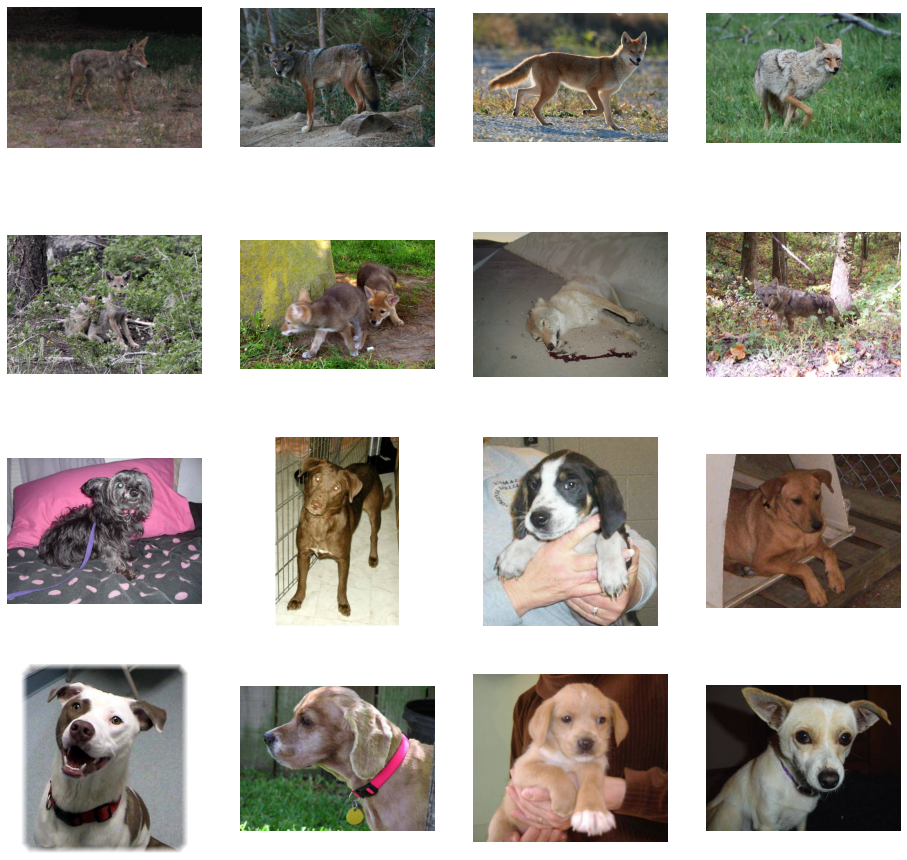

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_coyotes_pix = [os.path.join(train_coyotes_dir, fname) 
                for fname in train_coyotes_fnames[pic_index-8:pic_index]]
 #dog               
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_coyotes_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


**Data Augmentation**- agument via a number of random transformaion so model will never have exact same picture twice and this privent overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data agumentation, from existing data sample we generate new sample and increace acurecy of our data, so we can apply several transformation
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 15 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 15 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=6,
        class_mode='binary')

Found 1720 images belonging to 2 classes.
Found 704 images belonging to 2 classes.


**Adding Dropout** :to privent overfitting is use dropout.
We need to  convolution architecture 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

Retrain the data

**Train the Model**
This train and Validate 

In [34]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
100/100 - 49s - loss: 0.4168 - acc: 0.8415 - val_loss: 0.6068 - val_acc: 0.6700 - 49s/epoch - 486ms/step
Epoch 2/10
100/100 - 48s - loss: 0.4007 - acc: 0.8421 - val_loss: 0.2799 - val_acc: 0.8967 - 48s/epoch - 485ms/step
Epoch 3/10
100/100 - 48s - loss: 0.3867 - acc: 0.8602 - val_loss: 0.7422 - val_acc: 0.7933 - 48s/epoch - 478ms/step
Epoch 4/10
100/100 - 48s - loss: 0.3989 - acc: 0.8348 - val_loss: 0.6917 - val_acc: 0.7167 - 48s/epoch - 479ms/step
Epoch 5/10
100/100 - 48s - loss: 0.3806 - acc: 0.8495 - val_loss: 0.2716 - val_acc: 0.8633 - 48s/epoch - 478ms/step
Epoch 6/10
100/100 - 48s - loss: 0.4311 - acc: 0.8395 - val_loss: 0.3956 - val_acc: 0.8467 - 48s/epoch - 479ms/step
Epoch 7/10
100/100 - 48s - loss: 0.3885 - acc: 0.8401 - val_loss: 0.5628 - val_acc: 0.7800 - 48s/epoch - 478ms/step
Epoch 8/10
100/100 - 48s - loss: 0.3807 - acc: 0.8441 - val_loss: 0.5401 - val_acc: 0.8300 - 48s/epoch - 477ms/step
Epoch 9/10
100/100 - 48s - loss: 0.3959 - acc: 0.8500 - val_loss: 0.2872

Evaluate the Model

**Evaluate** the model training with data augmentaion and dropout

Text(0.5, 1.0, 'Training and validation loss')

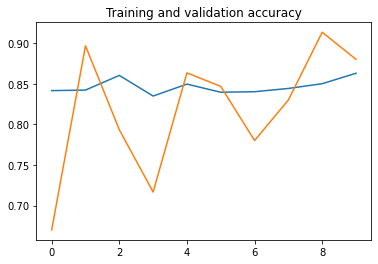

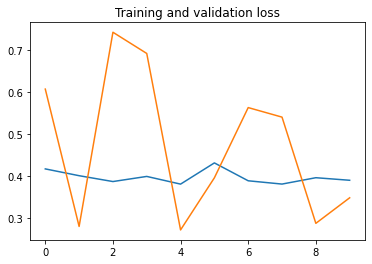

In [35]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# New Section

We're gettingget aroundut 88% accuracy and  low loss.